In [1]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [42]:
##### Complete Data preperation process for preparing X_train, y_train & X_test, y_test
## Importing the Dataset and applying threshold
data= pd.read_csv("Features_Variant_1.csv")
data['bin'] = np.where(data['no_of_comments']>=5, '1', '0')
test_sample=pd.read_excel("Final_Testset.xlsx")
test_sample['bin'] = np.where(test_sample['no_of_comments']>=5, '1', '0')
## Splitting the Dataset 
train_data, test_data1 = train_test_split(data, test_size = 0.3, random_state = 20)
## Final Test Data
test_data=test_data1.append(test_sample, ignore_index = True)
## data preperation
y_train=train_data['bin']
y_test=test_data['bin']
x_train=train_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
x_test=test_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_train = fea_scaling.transform(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_test = fea_scaling.transform(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])


C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


KNN Algorithm with varies K values and distance Metrics

[[10053   535]
 [ 1032  1665]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10588
           1       0.76      0.62      0.68      2697

   micro avg       0.88      0.88      0.88     13285
   macro avg       0.83      0.78      0.80     13285
weighted avg       0.88      0.88      0.88     13285

0.8820474219044034
[[22496   692]
 [ 1066  4410]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23188
           1       0.86      0.81      0.83      5476

   micro avg       0.94      0.94      0.94     28664
   macro avg       0.91      0.89      0.90     28664
weighted avg       0.94      0.94      0.94     28664

0.9386687133686855
[[10259   329]
 [ 1255  1442]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10588
           1       0.81      0.53      0.65      2697

   micro avg  

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23188
           1       0.84      0.68      0.75      5476

   micro avg       0.91      0.91      0.91     28664
   macro avg       0.88      0.83      0.85     28664
weighted avg       0.91      0.91      0.91     28664

0.9142827239743232


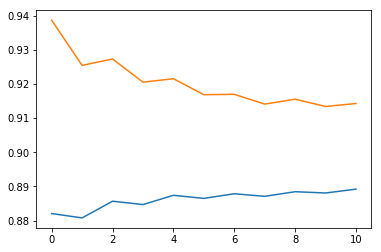

In [88]:
acc_score=[]
acc_score_train=[]
y_=[]
for i in range (3,14):
    model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    y_.append(y_pred)
    print(confusion_matrix(y_test,y_pred),'(Test)k =', i)
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_train,y_pred_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred_train))
    print(accuracy_score(y_train,y_pred_train))
    acc_score.append(accuracy_score(y_test,y_pred))
    acc_score_train.append(accuracy_score(y_train,y_pred_train))
plt.plot(acc_score)
plt.plot(acc_score_train)

[[10055   533]
 [ 1000  1697]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10588
           1       0.76      0.63      0.69      2697

   micro avg       0.88      0.88      0.88     13285
   macro avg       0.84      0.79      0.81     13285
weighted avg       0.88      0.88      0.88     13285

0.8846066992849078
[[22519   669]
 [ 1058  4418]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23188
           1       0.87      0.81      0.84      5476

   micro avg       0.94      0.94      0.94     28664
   macro avg       0.91      0.89      0.90     28664
weighted avg       0.94      0.94      0.94     28664

0.9397502093217974
[[10261   327]
 [ 1229  1468]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10588
           1       0.82      0.54      0.65      2697

   micro avg  

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23188
           1       0.84      0.68      0.75      5476

   micro avg       0.91      0.91      0.91     28664
   macro avg       0.88      0.83      0.85     28664
weighted avg       0.91      0.91      0.91     28664

0.9143873848730114


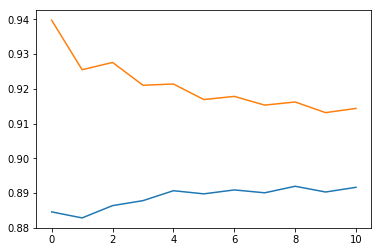

In [89]:
acc_score1=[]
acc_score1_train=[]
y1_=[]
for i in range (3,14):
    model1 = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    model1.fit(X_train,y_train)
    y_pred1=model1.predict(X_test)
    y_pred1_train=model1.predict(X_train)
    y1_.append(y_pred1)
    print(confusion_matrix(y_test,y_pred1),'(Test)k =', i)
    print(classification_report(y_test,y_pred1))
    print(accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_train,y_pred1_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred1_train))
    print(accuracy_score(y_train,y_pred1_train))
    acc_score1.append(accuracy_score(y_test,y_pred1))
    acc_score1_train.append(accuracy_score(y_train,y_pred1_train))
plt.plot(acc_score1)
plt.plot(acc_score1_train)

[[10053   535]
 [ 1032  1665]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10588
           1       0.76      0.62      0.68      2697

   micro avg       0.88      0.88      0.88     13285
   macro avg       0.83      0.78      0.80     13285
weighted avg       0.88      0.88      0.88     13285

0.8820474219044034
[[22496   692]
 [ 1066  4410]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23188
           1       0.86      0.81      0.83      5476

   micro avg       0.94      0.94      0.94     28664
   macro avg       0.91      0.89      0.90     28664
weighted avg       0.94      0.94      0.94     28664

0.9386687133686855
[[10259   329]
 [ 1255  1442]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10588
           1       0.81      0.53      0.65      2697

   micro avg  

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23188
           1       0.84      0.68      0.75      5476

   micro avg       0.91      0.91      0.91     28664
   macro avg       0.88      0.83      0.85     28664
weighted avg       0.91      0.91      0.91     28664

0.9142827239743232


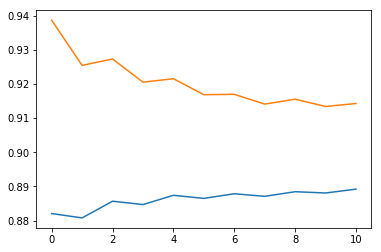

In [90]:
acc_score2=[]
acc_score2_train=[]
y2_=[]
for i in range (3,14):
    model2 = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    model2.fit(X_train,y_train)
    y_pred2=model2.predict(X_test)
    y_pred2_train=model2.predict(X_train)
    y2_.append(y_pred2)
    print(confusion_matrix(y_test,y_pred2),'(Test)k =', i)
    print(classification_report(y_test,y_pred2))
    print(accuracy_score(y_test,y_pred2))
    print(confusion_matrix(y_train,y_pred2_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred2_train))
    print(accuracy_score(y_train,y_pred2_train))
    acc_score2.append(accuracy_score(y_test,y_pred2))
    acc_score2_train.append(accuracy_score(y_train,y_pred2_train))
plt.plot(acc_score2)
plt.plot(acc_score2_train)

Artificial Neural Networks using Keras

In [66]:
## 3 Hidden Layers - First hidden layer with 100 neurons, second & Third  with 50 & 25 neurons - Activation function we will use relu

input_shap=12
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(X_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict))  
print(classification_report(y_test1,y_predict))
acc_score3=accuracy_score(y_test1,y_predict)
print(acc_score3)

Epoch 1/10
28664/28664 [==============================] - 8s 269us/step - loss: 0.2523 - acc: 0.9034
Epoch 2/10
28664/28664 [==============================] - 5s 188us/step - loss: 0.2299 - acc: 0.9098
Epoch 3/10
28664/28664 [==============================] - 5s 188us/step - loss: 0.2265 - acc: 0.9099
Epoch 4/10
28664/28664 [==============================] - 5s 188us/step - loss: 0.2233 - acc: 0.9101
Epoch 5/10
28664/28664 [==============================] - 5s 191us/step - loss: 0.2212 - acc: 0.9104
Epoch 6/10
28664/28664 [==============================] - 6s 202us/step - loss: 0.2184 - acc: 0.9118
Epoch 7/10
28664/28664 [==============================] - 6s 199us/step - loss: 0.2169 - acc: 0.9111
Epoch 8/10
28664/28664 [==============================] - 5s 190us/step - loss: 0.2149 - acc: 0.9121
Epoch 9/10
28664/28664 [==============================] - 5s 190us/step - loss: 0.2143 - acc: 0.9118
Epoch 10/10
28664/28664 [==============================] - 5s 189us/step - loss: 0.2132 - a

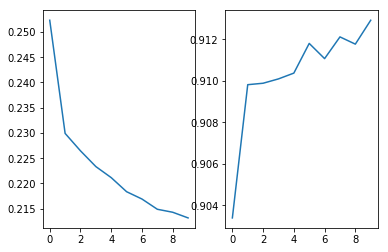

In [67]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['acc'])

In [61]:
## 2 Hidden Layers - First hidden layer with 50 neurons and second with 25 neurons with activation fucntion tanh

input_shap=12
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist1 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict1 = classifier.predict(X_test)
y_predict1 = np.where(y_predict1 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict1))  
print(classification_report(y_test1,y_predict1))
acc_score4=accuracy_score(y_test1,y_predict1)
print(acc_score4)

Epoch 1/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2721 - acc: 0.9016
Epoch 2/10
28664/28664 [==============================] - 5s 164us/step - loss: 0.2513 - acc: 0.9070
Epoch 3/10
28664/28664 [==============================] - 5s 167us/step - loss: 0.2428 - acc: 0.9097
Epoch 4/10
28664/28664 [==============================] - 5s 168us/step - loss: 0.2329 - acc: 0.9104
Epoch 5/10
28664/28664 [==============================] - 5s 170us/step - loss: 0.2279 - acc: 0.9103
Epoch 6/10
28664/28664 [==============================] - 5s 161us/step - loss: 0.2242 - acc: 0.9116
Epoch 7/10
28664/28664 [==============================] - 5s 160us/step - loss: 0.2221 - acc: 0.9111
Epoch 8/10
28664/28664 [==============================] - 5s 163us/step - loss: 0.2205 - acc: 0.9114
Epoch 9/10
28664/28664 [==============================] - 5s 162us/step - loss: 0.2189 - acc: 0.9118
Epoch 10/10
28664/28664 [==============================] - 4s 153us/step - loss: 0.2171 - a

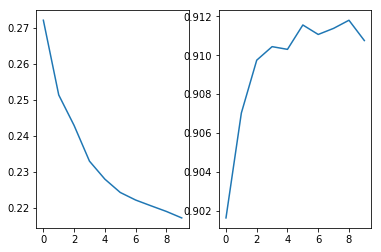

In [62]:
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist1.history['acc'])

In [63]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with activation fucntion tanh

input_shap=12
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist2 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict2 = classifier.predict(X_test)
y_predict2 = np.where(y_predict2 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict2))  
print(classification_report(y_test1,y_predict2))
acc_score5=accuracy_score(y_test1,y_predict2)
print(acc_score5)

Epoch 1/10
28664/28664 [==============================] - 3s 99us/step - loss: 0.2703 - acc: 0.9034
Epoch 2/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2506 - acc: 0.9073
Epoch 3/10
28664/28664 [==============================] - 2s 82us/step - loss: 0.2426 - acc: 0.9084
Epoch 4/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2373 - acc: 0.9074
Epoch 5/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2326 - acc: 0.9097
Epoch 6/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2279 - acc: 0.9088
Epoch 7/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2237 - acc: 0.9093
Epoch 8/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2205 - acc: 0.9111
Epoch 9/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2184 - acc: 0.9101
Epoch 10/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2171 - acc: 0.9109

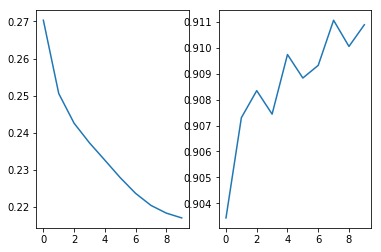

In [64]:
plt.subplot(1,2,1)
plt.plot(hist2.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist2.history['acc'])

In [65]:
## 4 Hidden Layers - First hidden layer with 150 neurons and second & Third with 100 , 50 & 25 neurons with activation fucntion tanh

input_shap=12
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist3 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict3 = classifier.predict(X_test)
y_predict3 = np.where(y_predict3 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict3))  
print(classification_report(y_test1,y_predict3))
acc_score6=accuracy_score(y_test1,y_predict3)
print(acc_score6)

Epoch 1/10
28664/28664 [==============================] - 7s 257us/step - loss: 0.2722 - acc: 0.9024
Epoch 2/10
28664/28664 [==============================] - 6s 213us/step - loss: 0.2495 - acc: 0.9058
Epoch 3/10
28664/28664 [==============================] - 6s 215us/step - loss: 0.2474 - acc: 0.9062
Epoch 4/10
28664/28664 [==============================] - 6s 216us/step - loss: 0.2460 - acc: 0.9062
Epoch 5/10
28664/28664 [==============================] - 6s 214us/step - loss: 0.2385 - acc: 0.9060
Epoch 6/10
28664/28664 [==============================] - 6s 217us/step - loss: 0.2327 - acc: 0.9070
Epoch 7/10
28664/28664 [==============================] - 6s 218us/step - loss: 0.2284 - acc: 0.9093
Epoch 8/10
28664/28664 [==============================] - 6s 216us/step - loss: 0.2238 - acc: 0.9087
Epoch 9/10
28664/28664 [==============================] - 6s 222us/step - loss: 0.2218 - acc: 0.9090
Epoch 10/10
28664/28664 [==============================] - 6s 213us/step - loss: 0.2202 - a

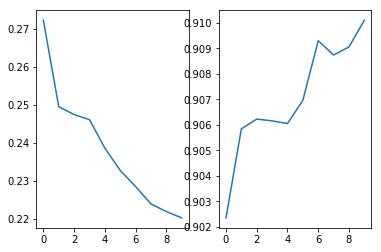

In [68]:
plt.subplot(1,2,1)
plt.plot(hist3.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist3.history['acc'])

Three Hidden layers are performing the best

In [69]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion tanh

input_shap=12
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'tanh'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist4 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict4 = classifier.predict(X_test)
y_predict4 = np.where(y_predict4 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict4))  
print(classification_report(y_test1,y_predict4))
acc_score7=accuracy_score(y_test1,y_predict4)
print(acc_score7)

Epoch 1/10
28664/28664 [==============================] - 7s 245us/step - loss: 0.3630 - acc: 0.8740
Epoch 2/10
28664/28664 [==============================] - 5s 192us/step - loss: 0.3450 - acc: 0.8817
Epoch 3/10
28664/28664 [==============================] - 6s 193us/step - loss: 0.3365 - acc: 0.8879
Epoch 4/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.3134 - acc: 0.8909
Epoch 5/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.3405 - acc: 0.8728
Epoch 6/10
28664/28664 [==============================] - 5s 192us/step - loss: 0.3205 - acc: 0.8883
Epoch 7/10
28664/28664 [==============================] - 6s 192us/step - loss: 0.3014 - acc: 0.8970
Epoch 8/10
28664/28664 [==============================] - 5s 191us/step - loss: 0.3456 - acc: 0.8866
Epoch 9/10
28664/28664 [==============================] - 6s 192us/step - loss: 0.3336 - acc: 0.8823
Epoch 10/10
28664/28664 [==============================] - 5s 191us/step - loss: 0.3671 - a

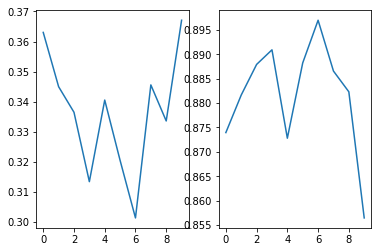

In [70]:
plt.subplot(1,2,1)
plt.plot(hist4.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist4.history['acc'])

In [71]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion sigmoid

input_shap=12
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'sigmoid', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist5 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict5 = classifier.predict(X_test)
y_predict5 = np.where(y_predict5 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict5))  
print(classification_report(y_test1,y_predict5))
acc_score8=accuracy_score(y_test1,y_predict5)
print(acc_score8)

Epoch 1/10
28664/28664 [==============================] - 7s 245us/step - loss: 0.3296 - acc: 0.8699
Epoch 2/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2465 - acc: 0.9084
Epoch 3/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2443 - acc: 0.9085
Epoch 4/10
28664/28664 [==============================] - 6s 205us/step - loss: 0.2418 - acc: 0.9095
Epoch 5/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2381 - acc: 0.9100
Epoch 6/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2339 - acc: 0.9100
Epoch 7/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2317 - acc: 0.9106
Epoch 8/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2307 - acc: 0.9103
Epoch 9/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2295 - acc: 0.9100
Epoch 10/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2282 - a

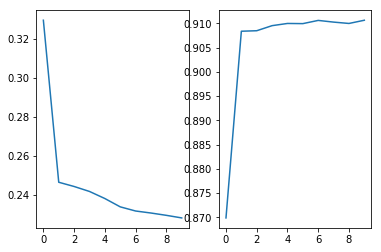

In [73]:
plt.subplot(1,2,1)
plt.plot(hist5.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist5.history['acc'])

In [74]:
### Experiment various number of neurons with 3 layers and tanh function for hidden layers and sigmoid function for the output layers

input_shap=12
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist6 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict6 = classifier.predict(X_test)
y_predict6 = np.where(y_predict6 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict6))  
print(classification_report(y_test1,y_predict6))
acc_score9=accuracy_score(y_test1,y_predict6)
print(acc_score9)

Epoch 1/10
28664/28664 [==============================] - 9s 329us/step - loss: 0.2747 - acc: 0.9013
Epoch 2/10
28664/28664 [==============================] - 7s 250us/step - loss: 0.2504 - acc: 0.9071
Epoch 3/10
28664/28664 [==============================] - 7s 249us/step - loss: 0.2401 - acc: 0.9080
Epoch 4/10
28664/28664 [==============================] - 7s 250us/step - loss: 0.2345 - acc: 0.9094
Epoch 5/10
28664/28664 [==============================] - 7s 249us/step - loss: 0.2315 - acc: 0.9085
Epoch 6/10
28664/28664 [==============================] - 8s 263us/step - loss: 0.2290 - acc: 0.9095
Epoch 7/10
28664/28664 [==============================] - 6s 216us/step - loss: 0.2273 - acc: 0.9095
Epoch 8/10
28664/28664 [==============================] - 6s 193us/step - loss: 0.2263 - acc: 0.9104
Epoch 9/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2243 - acc: 0.9100
Epoch 10/10
28664/28664 [==============================] - 5s 192us/step - loss: 0.2231 - a

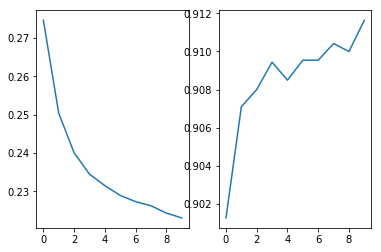

In [76]:
plt.subplot(1,2,1)
plt.plot(hist6.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist6.history['acc'])

In [77]:
input_shap=12
classifier = Sequential()
classifier.add(Dense(20, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist7 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict7 = classifier.predict(X_test)
y_predict7 = np.where(y_predict7 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict7))  
print(classification_report(y_test1,y_predict7))
acc_score10=accuracy_score(y_test1,y_predict7)
print(acc_score10)

Epoch 1/10
28664/28664 [==============================] - 9s 303us/step - loss: 0.2871 - acc: 0.9010
Epoch 2/10
28664/28664 [==============================] - 6s 194us/step - loss: 0.2494 - acc: 0.9079
Epoch 3/10
28664/28664 [==============================] - 6s 205us/step - loss: 0.2442 - acc: 0.9087
Epoch 4/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2398 - acc: 0.9096
Epoch 5/10
28664/28664 [==============================] - 6s 194us/step - loss: 0.2358 - acc: 0.9102
Epoch 6/10
28664/28664 [==============================] - 6s 193us/step - loss: 0.2317 - acc: 0.9102
Epoch 7/10
28664/28664 [==============================] - 6s 193us/step - loss: 0.2287 - acc: 0.9107
Epoch 8/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2269 - acc: 0.9099
Epoch 9/10
28664/28664 [==============================] - 6s 206us/step - loss: 0.2256 - acc: 0.9103
Epoch 10/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2240 - a

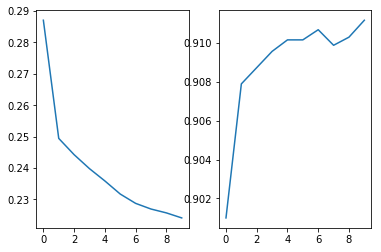

In [79]:
plt.subplot(1,2,1)
plt.plot(hist7.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist7.history['acc'])

In [78]:
input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist8 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict8 = classifier.predict(X_test)
y_predict8 = np.where(y_predict8 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict8))  
print(classification_report(y_test1,y_predict8))
acc_score11=accuracy_score(y_test1,y_predict8)
print(acc_score11)

Epoch 1/10
28664/28664 [==============================] - 7s 255us/step - loss: 0.3018 - acc: 0.8973
Epoch 2/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2504 - acc: 0.9085
Epoch 3/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2459 - acc: 0.9089
Epoch 4/10
28664/28664 [==============================] - 6s 197us/step - loss: 0.2417 - acc: 0.9087
Epoch 5/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2383 - acc: 0.9099
Epoch 6/10
28664/28664 [==============================] - 6s 198us/step - loss: 0.2355 - acc: 0.9109
Epoch 7/10
28664/28664 [==============================] - 6s 196us/step - loss: 0.2323 - acc: 0.9104
Epoch 8/10
28664/28664 [==============================] - 6s 205us/step - loss: 0.2300 - acc: 0.9104
Epoch 9/10
28664/28664 [==============================] - 6s 198us/step - loss: 0.2273 - acc: 0.9104
Epoch 10/10
28664/28664 [==============================] - 6s 195us/step - loss: 0.2256 - a

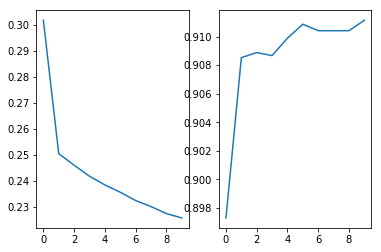

In [80]:
plt.subplot(1,2,1)
plt.plot(hist8.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist8.history['acc'])

In [81]:
## We will experiment with various optimizer function

input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'SGD',loss='binary_crossentropy', metrics=['accuracy'])
hist9 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict9 = classifier.predict(X_test)
y_predict9 = np.where(y_predict9 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict9))  
print(classification_report(y_test1,y_predict9))
acc_score12=accuracy_score(y_test1,y_predict9)
print(acc_score12)

Epoch 1/10
28664/28664 [==============================] - 9s 316us/step - loss: 0.5054 - acc: 0.8089
Epoch 2/10
28664/28664 [==============================] - 5s 187us/step - loss: 0.4878 - acc: 0.8090
Epoch 3/10
28664/28664 [==============================] - 5s 184us/step - loss: 0.4878 - acc: 0.8090
Epoch 4/10
28664/28664 [==============================] - 5s 185us/step - loss: 0.4878 - acc: 0.8090
Epoch 5/10
28664/28664 [==============================] - 5s 183us/step - loss: 0.4878 - acc: 0.8090
Epoch 6/10
28664/28664 [==============================] - 5s 184us/step - loss: 0.4877 - acc: 0.8090
Epoch 7/10
28664/28664 [==============================] - 5s 186us/step - loss: 0.4877 - acc: 0.8090
Epoch 8/10
28664/28664 [==============================] - 5s 183us/step - loss: 0.4875 - acc: 0.8090
Epoch 9/10
28664/28664 [==============================] - 5s 183us/step - loss: 0.4860 - acc: 0.8090
Epoch 10/10
28664/28664 [==============================] - 5s 183us/step - loss: 0.4071 - a

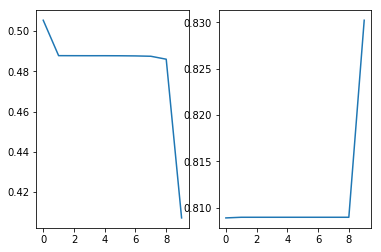

In [82]:
plt.subplot(1,2,1)
plt.plot(hist9.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist9.history['acc'])

In [83]:
## We will experiment with various optimizer function

input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'AdaDelta',loss='binary_crossentropy', metrics=['accuracy'])
hist10 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict10 = classifier.predict(X_test)
y_predict10 = np.where(y_predict10 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict10))  
print(classification_report(y_test1,y_predict10))
acc_score13=accuracy_score(y_test1,y_predict10)
print(acc_score13)

Epoch 1/10
28664/28664 [==============================] - 3s 115us/step - loss: 0.2688 - acc: 0.9022
Epoch 2/10
28664/28664 [==============================] - 2s 87us/step - loss: 0.2457 - acc: 0.9084
Epoch 3/10
28664/28664 [==============================] - 2s 87us/step - loss: 0.2430 - acc: 0.9082
Epoch 4/10
28664/28664 [==============================] - 2s 86us/step - loss: 0.2419 - acc: 0.9075
Epoch 5/10
28664/28664 [==============================] - 2s 87us/step - loss: 0.2409 - acc: 0.9076
Epoch 6/10
28664/28664 [==============================] - 3s 87us/step - loss: 0.2406 - acc: 0.9084: 1s  - ETA: 0s - loss: 0.2408 - a
Epoch 7/10
28664/28664 [==============================] - 2s 87us/step - loss: 0.2397 - acc: 0.9099
Epoch 8/10
28664/28664 [==============================] - 3s 88us/step - loss: 0.2397 - acc: 0.9083
Epoch 9/10
28664/28664 [==============================] - 3s 87us/step - loss: 0.2375 - acc: 0.9083
Epoch 10/10
28664/28664 [==============================] - 3s 94u

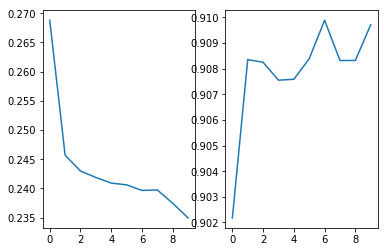

In [84]:
plt.subplot(1,2,1)
plt.plot(hist10.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist10.history['acc'])

In [85]:
## We will experiment with various optimizer function

input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'AdaGrad',loss='binary_crossentropy', metrics=['accuracy'])
hist11 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict11 = classifier.predict(X_test)
y_predict11 = np.where(y_predict11 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict11))  
print(classification_report(y_test1,y_predict11))
acc_score14=accuracy_score(y_test1,y_predict11)
print(acc_score14)

Epoch 1/10
28664/28664 [==============================] - 3s 111us/step - loss: 0.3299 - acc: 0.8910
Epoch 2/10
28664/28664 [==============================] - 2s 85us/step - loss: 0.2656 - acc: 0.9066
Epoch 3/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2575 - acc: 0.9088
Epoch 4/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2548 - acc: 0.9084
Epoch 5/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2530 - acc: 0.9087
Epoch 6/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2519 - acc: 0.9089
Epoch 7/10
28664/28664 [==============================] - 2s 78us/step - loss: 0.2509 - acc: 0.9090
Epoch 8/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2503 - acc: 0.9090
Epoch 9/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2497 - acc: 0.9090
Epoch 10/10
28664/28664 [==============================] - 2s 79us/step - loss: 0.2491 - acc: 0.909

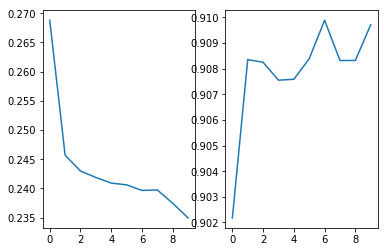

In [86]:
plt.subplot(1,2,1)
plt.plot(hist10.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist10.history['acc'])

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Euclidean distance')

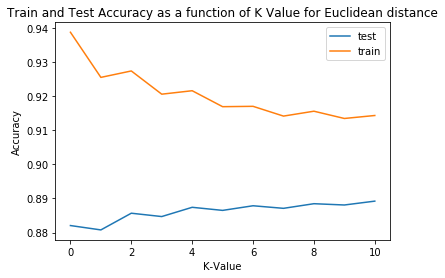

In [92]:
plt.plot(acc_score,label='test')
plt.plot(acc_score_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Euclidean distance")

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Manhattan distance')

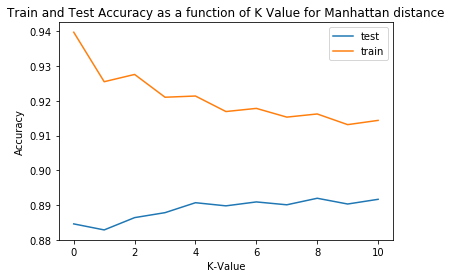

In [95]:
plt.plot(acc_score1,label='test')
plt.plot(acc_score1_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Manhattan distance")

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Minkowski distance')

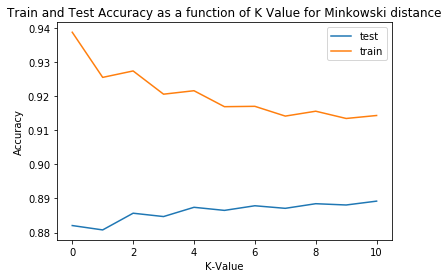

In [96]:
plt.plot(acc_score2,label='test')
plt.plot(acc_score2_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Minkowski distance")

PlOTS for ANN

Text(0.5, 1.0, 'Train and Test Accuracy as a function of Number of Hidden Layers in ANN')

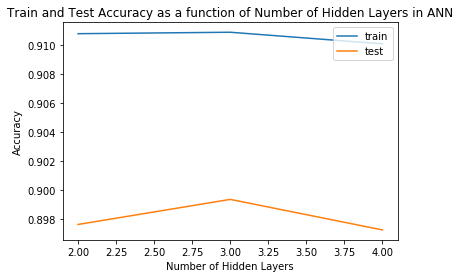

In [101]:

### plots for Train and Test accuracy as a function of Number of layers
test_accuracy = [acc_score4,acc_score5,acc_score6]
train_accuracy=[0.9108,0.9109,0.9101]
layers=[2,3,4]
plt.plot(layers,train_accuracy,label='train')
plt.plot(layers,test_accuracy,label='test')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of Number of Hidden Layers in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Activation functions in ANN')

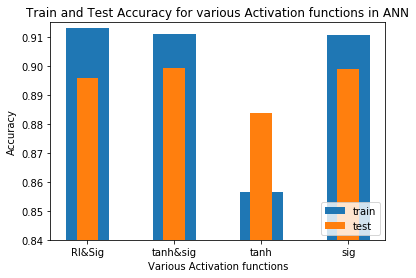

In [113]:
### plots for Train and Test accuracy for various activation functions
test_accuracy = [acc_score3,acc_score5,acc_score7,acc_score8]
train_accuracy=[0.9129,0.9109,0.8564,0.9107]
Act_fun=["Rl&Sig","tanh&sig","tanh","sig"]

plt.bar(Act_fun,train_accuracy,label='train',width=0.5)
plt.bar(Act_fun,test_accuracy,label='test',width=0.25)
plt.xlabel("Various Activation functions")
plt.ylim([0.84, 0.915])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Activation functions in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Number of Neurons')

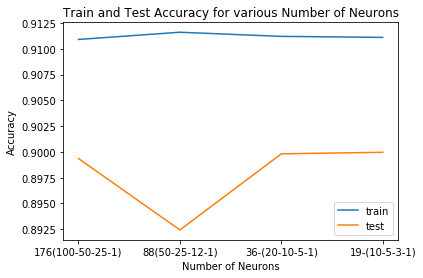

In [115]:
### plots for Train and Test accuracy for Increasing Number of Neurons
test_accuracy = [acc_score5,acc_score9,acc_score10,acc_score11]
train_accuracy=[0.9109,0.9116,0.9112,0.9111]
Num_of_Neurons=["176(100-50-25-1)","88(50-25-12-1)","36-(20-10-5-1)","19-(10-5-3-1)"]

plt.plot(Num_of_Neurons,train_accuracy,label='train')
plt.plot(Num_of_Neurons,test_accuracy,label='test')
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Number of Neurons")

Text(0.5, 1.0, 'Train and Test Accuracy for various Optimizer functions in ANN')

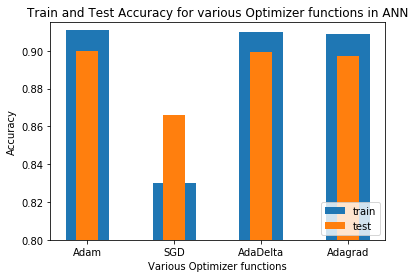

In [118]:
### Plots for Train and Test Accuracy for various optimizer function
test_accuracy = [acc_score11,acc_score12,acc_score13,acc_score14]
train_accuracy=[0.9111,0.8302,0.9097,0.909]
Opt_fun=["Adam","SGD","AdaDelta","Adagrad"]

plt.bar(Opt_fun,train_accuracy,label='train',width=0.5)
plt.bar(Opt_fun,test_accuracy,label='test',width=0.25)
plt.xlabel("Various Optimizer functions")
plt.ylim([0.8, 0.915])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Optimizer functions in ANN")